In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma

# First-Order Polynomial Constant Model 

Observational and evolution variances (W and V) are constant over time. Univariate time series with no intercept.
<br>
<br>

<center> <b>Observation Equation</b><br>
   <br>
   Y_{t} = Q_{t} + V where,  V ~ N[0, v_{t}]    <br>
    
    
 <br><center><b>State Equation </b><br>
   
   <br>
   Q_{t} = Q_{t-1} + W where, W ~ N[0, v_{t})]    
   <br>
    
 <br><center><b>Initial Conditions </b> <br>
    <br>
    Q0 ~ N[m_{0}, C_{0}] </center></center></center>

### Example excercise from West & Harrison to start with

In [ ]:
Yt = [150, 136, 143, 154, 135, 148, 128, 149, 146]
m0 = 130
C0 = 400
V = 100
W = 5
df = pd.DataFrame(columns = ['Yt', 'mt', 'Ct', 'ft', 'Qt', 'At', 'et'])

time_index = 0
m_t = None
c_t = None


for Y in Yt:
    if time_index == 0:
        m_pt = m0
        c_pt = C0
        time_index += 1
    else:
        m_pt = m_t
        c_pt = c_t
        time_index += 1
        
    f_t = m_pt
    R_t = c_pt + W
    Q_t = R_t + V
    A_t = R_t/Q_t
    e_t = Y-f_t 
    c_t = (A_t*V)
    m_t = f_t + ((A_t*e_t))
    df = df.append({'Yt': Y,
                    'mt': m_t,
                    'ft':f_t,
                    'Ct': c_t,
                    'Qt': Q_t,
                    'At': A_t,
                    'et': e_t
                   }, ignore_index=True)
    
df.round(1)

# Air Passanger DataSet

In [2]:
df = pd.read_csv("AirPassengers.csv")
df['Month']= pd.to_datetime(df['Month'], format='%Y-%m').dt.strftime('%Y-%m')
df['Passengers'] = df['#Passengers']
df.drop(['#Passengers'], axis=1, inplace= True)
print(df.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


# Forward Filtering

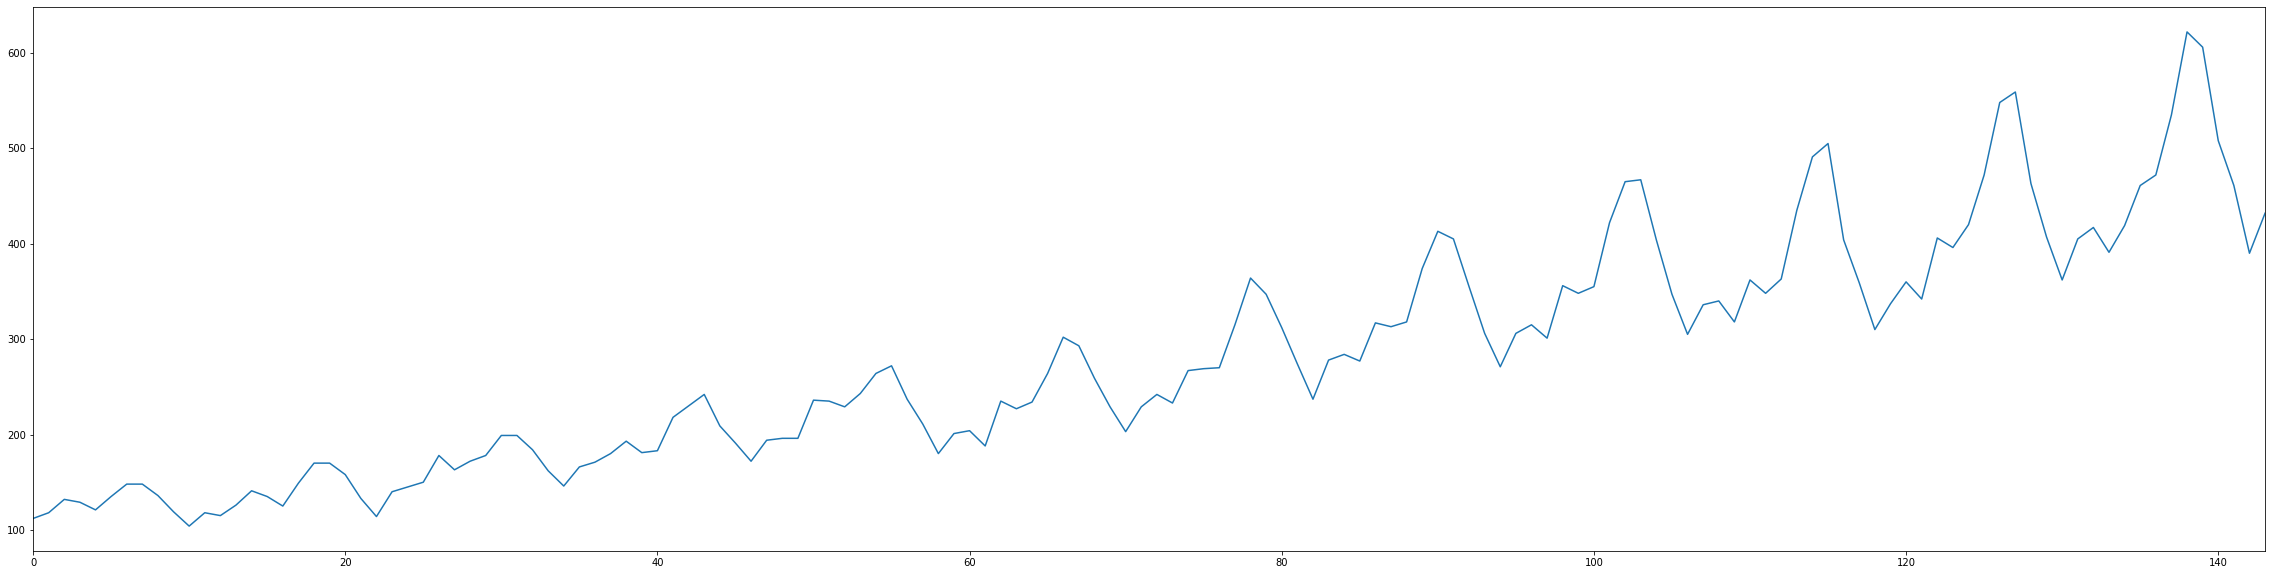

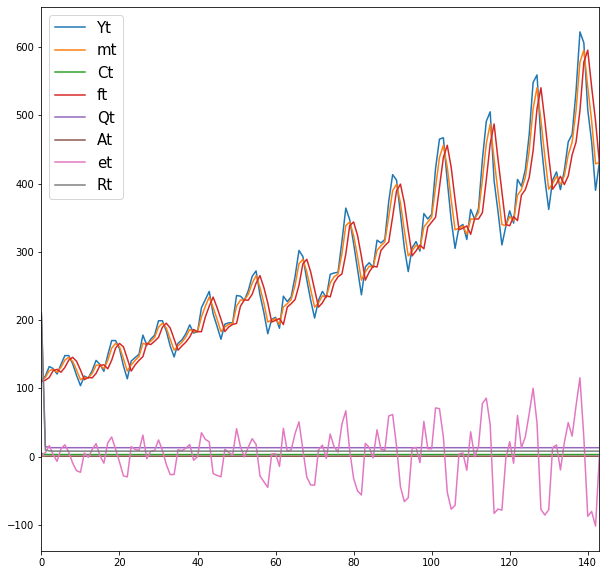

In [3]:
Yt = df['Passengers']
m0 = 110
C0 = 200
# V & W will be also a random draw normal - inverse gamma for both. 
V = 5
W = 5
ff_df = pd.DataFrame(columns = ['Yt', 'mt', 'Ct', 'ft', 'Qt', 'At', 'et', 'Rt'])

time_index = 0
m_t = None
c_t = None


for Y in Yt:
    if time_index == 0:
        m_pt = m0
        c_pt = C0
        time_index += 1
    else:
        m_pt = m_t 
        c_pt = c_t
        time_index += 1
        
    f_t = m_pt
    R_t = c_pt + W
    Q_t = R_t + V
    A_t = R_t/Q_t
    e_t = Y - f_t 
    c_t = (A_t*V)
    m_t = f_t + ((A_t*e_t))
    ff_df = ff_df.append({'Yt': Y,
                    'mt': m_t,
                    'ft':f_t,
                    'Ct': c_t,
                    'Qt': Q_t,
                    'At': A_t,
                    'et': e_t,
                    'Rt': R_t
                        
                   }, ignore_index=True)
    
ff_df
Yt.plot.line(figsize=(40,10), label='Yt')
# plt.plot(ff_df['mt'], label = 'mt')
# plt.legend()
# plt.show()

ff_df.plot.line(figsize=(10,10))
plt.legend(loc=2, prop={'size': 15})

# Backward Sampling

In [4]:
m_T = ff_df.iloc[-1]['mt']
c_T = ff_df.iloc[-1]['Ct']
theta_T = np.random.normal(m_T, c_T)

thetas = pd.DataFrame(columns = ['Theta'])

for i in range(len(ff_df['Yt'])-1,-1,-1):
    if i == len(ff_df['Yt'])-1:
        theta_nt = theta_T
        #print(i, round(theta_nt,1))
        
    else:
#         print()
#         print(i, round(theta_nt, 1))
        B_t = (ff_df.iloc[i]['Ct']/ff_df.iloc[i+1]['Rt'])
        
# Drawing theta from theta_nt
        g_t = ff_df.iloc[i]['mt'] + B_t*(theta_nt - ff_df.iloc[i+1]['mt'])
        H_t = ff_df.iloc[i]['Ct'] - (B_t*ff_df.iloc[i+1]['Rt']*B_t)
        theta_nt = np.random.normal(g_t, H_t)
    thetas = thetas.append({'Theta': theta_nt}, ignore_index= True)

a = []
for i in range(len(thetas['Theta'])-1,-1,-1):
    a.append(thetas['Theta'][i])

a = pd.DataFrame(a)
a

# Yt.plot.line(figsize=(30,10), label='Yt')
# plt.plot(a, label = 'Thetas')
# plt.legend(loc=2, prop={'size': 30})
# plt.show()

# # Draw V & W 

,0
0,113.838377
1,111.732502
2,123.812609
3,125.056096
4,125.374219
...,...
139,596.950362
140,541.846727
141,493.134461
142,431.599105


# Way Forward

- Setup Gibbs Sampling with Burn in periods (Carter & Kohn Paper) <br>
- Extend model to Multivariate Time Series with Matrix for Parameters, Variances, etc. <br> 
- Hierarchical models  <br>
- Add other features such as seasonality, etc.  <br>
- Optimize Code for large datasets (DASK) <br>

In [ ]:
m_T = ff_df.iloc[-1]['mt']
c_T = ff_df.iloc[-1]['Ct']
theta_T = np.random.normal(m_T, c_T)

thetas = pd.DataFrame(columns = ['Theta'])

for i in range(len(ff_df['Yt'])-1,-1,-1):
    if i == len(ff_df['Yt'])-1:
        theta_nt = theta_T
        #print(i, round(theta_nt,1))
        
    else:
#         print()
#         print(i, round(theta_nt, 1))
        B_t = (ff_df.iloc[i]['Ct']/ff_df.iloc[i+1]['Rt'])
        

In [122]:
Yt = df['Passengers']
df_list = list()

for draw in range(60):
    time_index = 0
    m_t = None
    c_t = None
    m0 = 10
    C0 = 20
    E_Y_Theta_Sqr_Sum = 0 
    E_Theta_Theta_Sqr_Sum = 0
    
    if draw  == 0:
        V = 1
        W = 1
   
    else:
        V = invgamma.rvs((1+len(Yt)),scale=(0.6+E_Y_Theta_Sqr_Sum))
        W = invgamma.rvs((1+len(Yt)-1)/2,scale=(0.001+E_Theta_Theta_Sqr_Sum)/2)
        
    ff_df = pd.DataFrame(columns = ['Yt', 'mt', 'Ct', 'ft', 'Qt', 'At', 'et', 'Rt'])
    
    for Y in Yt:
        if time_index == 0:
            m_pt = m0
            c_pt = C0
            time_index += 1
        else:
            m_pt = m_t 
            c_pt = c_t
            time_index += 1

        f_t = m_pt
        V_t = V
        W_t = W
        R_t = c_pt + W
        Q_t = R_t + V
        A_t = R_t/Q_t
        e_t = Y - f_t 
        c_t = (A_t*V)
        m_t = f_t + ((A_t*e_t))
        ff_df = ff_df.append({'Yt': Y,
                        'mt': m_t,
                        'ft':f_t,
                        'Ct': c_t,
                        'Qt': Q_t,
                        'At': A_t,
                        'et': e_t,
                        'Rt': R_t,
                        'Vt': V_t,
                        'Wt': W_t

                       }, ignore_index=True)


    # Yt.plot.line(figsize=(40,10), label='Yt')
    # # plt.plot(ff_df['mt'], label = 'mt')
    # # plt.legend()
    # # plt.show()

    # ff_df.plot.line(figsize=(10,10))
    # plt.legend(loc=2, prop={'size': 15})

    m_T = ff_df.iloc[-1]['mt']
    c_T = ff_df.iloc[-1]['Ct']
    theta_T = np.random.normal(m_T, c_T)

    thetas = pd.DataFrame(columns = ['Theta'])

    for i in range(len(ff_df['Yt'])-1,-1,-1):
        if i == len(ff_df['Yt'])-1:
            theta_nt = theta_T
            #print(i, round(theta_nt,1))

        else:
    #         print()
    #         print(i, round(theta_nt, 1))
            B_t = (ff_df.iloc[i]['Ct']/ff_df.iloc[i+1]['Rt'])

    # Drawing theta from theta_t+1
            g_t = ff_df.iloc[i]['mt'] + B_t*(theta_nt - ff_df.iloc[i+1]['mt'])
            H_t = ff_df.iloc[i]['Ct'] - (B_t*ff_df.iloc[i+1]['Rt']*B_t)
            theta_nt = np.random.normal(g_t, H_t)
        thetas = thetas.append({'Theta': theta_nt}, ignore_index= True)

    a = []
    for i in range(len(thetas['Theta'])-1,-1,-1):
        a.append(thetas['Theta'][i])

    a = pd.DataFrame(a)
    ff_df['Theta'] = a
    ff_df['E_Y_Theta_Sqr'] = (ff_df['Yt']-ff_df['Theta'])*(ff_df['Yt']-ff_df['Theta'])
    E_Y_Theta_Sqr_Sum = ff_df['E_Y_Theta_Sqr'].sum()
    
    ff_df['E_Theta_Theta_Sqr'] = (ff_df['Theta'].diff(periods = 1))*(ff_df['Theta'].diff(periods = 1))
    E_Theta_Theta_Sqr_Sum = ff_df['E_Theta_Theta_Sqr'].sum()
    ff_df.rename(columns = {'Yt':'Yt'+str(draw),
                            'mt':'mt'+str(draw),
                            'Ct':'Ct'+str(draw),
                            'ft':'ft'+str(draw),
                            'Qt':'Qt'+str(draw),
                            'At':'At'+str(draw),
                            'et':'et'+str(draw),
                            'Rt':'Rt'+str(draw),
                            'Vt':'Vt'+str(draw),
                            'Wt':'Wt'+str(draw),
                            'Theta':'Theta'+str(draw),
                            'E_Y_Theta_Sqr':'E_Y_Theta_Sqr'+str(draw),
                            'E_Theta_Theta_Sqr':'E_Theta_Theta_Sqr'+str(draw)
                           }, inplace= True)
    df_list.append(ff_df)

df_list[-1]
# E_Y_Theta_Sqr_Sum

#     Yt.plot.line(figsize=(30,10), label='Yt')
#     plt.plot(a, label = 'Thetas')
#     plt.legend(loc=2, prop={'size': 30})
#     plt.show()

    # Draw V & W 


,Yt59,mt59,Ct59,ft59,Qt59,At59,et59,Rt59,Vt59,Wt59,Theta59,E_Y_Theta_Sqr59,E_Theta_Theta_Sqr59
0,112.0,111.977246,0.004462,10.000000,20.004469,0.999777,102.000000,20.000007,0.004463,0.000007,111.977268,0.000517,NaN
1,118.0,114.990612,0.002233,111.977246,0.008931,0.500330,6.022754,0.004468,0.004463,0.000007,114.990639,9.056257,9.080404
2,132.0,120.674565,0.001491,114.990612,0.006702,0.334166,17.009388,0.002240,0.004463,0.000007,120.674582,128.265091,32.307215
3,129.0,122.767036,0.001122,120.674565,0.005961,0.251335,8.325435,0.001498,0.004463,0.000007,122.767037,38.849828,4.378367
4,121.0,122.410380,0.000901,122.767036,0.005591,0.201839,-1.767036,0.001128,0.004463,0.000007,122.410380,1.989170,0.127205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,606.0,405.559420,0.000172,397.524727,0.004641,0.038540,208.475273,0.000179,0.004463,0.000007,405.559631,40176.341516,64.556375
140,508.0,409.507497,0.000172,405.559420,0.004641,0.038540,102.440580,0.000179,0.004463,0.000007,409.507725,9700.728194,15.587448
141,461.0,411.492022,0.000172,409.507497,0.004641,0.038540,51.492503,0.000179,0.004463,0.000007,411.492253,2451.016974,3.938352
142,390.0,410.663720,0.000172,411.492022,0.004641,0.038540,-21.492022,0.000179,0.004463,0.000007,410.663968,426.999587,0.686056


413.83928831538077

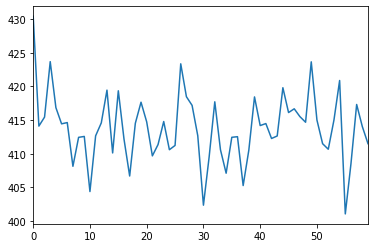

In [130]:
theta_df = pd.DataFrame()
for i in range(len(df_list)):
    a = df_list[i].loc[:, df_list[i].columns.str.startswith('Theta')].T
    theta_df = theta_df.append(a, ignore_index=True)
theta_df
theta_df[143].plot()
theta_df[143].mean()
# theta_df[142].std()

theta = 112.00103665658779
W (Evolution Variance) = 0.006663606547580611


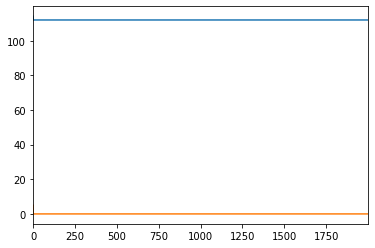

In [95]:
n = 0

theta_df = pd.DataFrame()
for i in range(len(df_list)):
    a = df_list[i].loc[:, df_list[i].columns.str.startswith('Theta')].T
    theta_df = theta_df.append(a, ignore_index=True)
theta_df
theta_df[n].plot()
print(f"theta = {theta_df[n].mean()}")

evolutionVar_df = pd.DataFrame()
for i in range(len(df_list)):
    a = df_list[i].loc[:, df_list[i].columns.str.startswith('V')].T
    evolutionVar_df = evolutionVar_df.append(a, ignore_index=True)
evolutionVar_df[n].plot()
print(f"W (Evolution Variance) = {evolutionVar_df[n].mean()}")

# ObservationVar_df = pd.DataFrame()
# for i in range(len(df_list)):
#     a = df_list[i].loc[:, df_list[i].columns.str.startswith('W')].T
#     ObservationVar_df = ObservationVar_df.append(a, ignore_index=True)
# ObservationVar_df[n].plot()
# print(f"V (Observational Variance) = {ObservationVar_df[n].mean()}")

In [104]:
evolutionVar_df = pd.DataFrame()
for i in range(len(df_list)):
    a = df_list[i].loc[:, df_list[i].columns.str.startswith('V')].T
    evolutionVar_df = evolutionVar_df.append(a, ignore_index=True)

In [105]:
evolutionVar_df

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.004350,0.004350,0.004350,0.004350,0.004350,0.004350,0.004350,0.004350,0.004350,0.004350,...,0.004350,0.004350,0.004350,0.004350,0.004350,0.004350,0.004350,0.004350,0.004350,0.004350
2,0.004184,0.004184,0.004184,0.004184,0.004184,0.004184,0.004184,0.004184,0.004184,0.004184,...,0.004184,0.004184,0.004184,0.004184,0.004184,0.004184,0.004184,0.004184,0.004184,0.004184
3,0.004398,0.004398,0.004398,0.004398,0.004398,0.004398,0.004398,0.004398,0.004398,0.004398,...,0.004398,0.004398,0.004398,0.004398,0.004398,0.004398,0.004398,0.004398,0.004398,0.004398
4,0.004417,0.004417,0.004417,0.004417,0.004417,0.004417,0.004417,0.004417,0.004417,0.004417,...,0.004417,0.004417,0.004417,0.004417,0.004417,0.004417,0.004417,0.004417,0.004417,0.004417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.003637,0.003637,0.003637,0.003637,0.003637,0.003637,0.003637,0.003637,0.003637,0.003637,...,0.003637,0.003637,0.003637,0.003637,0.003637,0.003637,0.003637,0.003637,0.003637,0.003637
1996,0.003782,0.003782,0.003782,0.003782,0.003782,0.003782,0.003782,0.003782,0.003782,0.003782,...,0.003782,0.003782,0.003782,0.003782,0.003782,0.003782,0.003782,0.003782,0.003782,0.003782
1997,0.004737,0.004737,0.004737,0.004737,0.004737,0.004737,0.004737,0.004737,0.004737,0.004737,...,0.004737,0.004737,0.004737,0.004737,0.004737,0.004737,0.004737,0.004737,0.004737,0.004737
1998,0.003781,0.003781,0.003781,0.003781,0.003781,0.003781,0.003781,0.003781,0.003781,0.003781,...,0.003781,0.003781,0.003781,0.003781,0.003781,0.003781,0.003781,0.003781,0.003781,0.003781


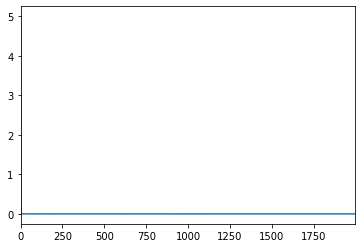

In [107]:
evolutionVar_df[0].plot()

In [108]:
Yt = df['Passengers']
df_list = list()


for draw in range(200):
    time_index = 0
    m_t = None
    c_t = None
    m0 = 110
    C0 = 200
    E_Y_Theta_Sqr_Sum = 0 
    E_Theta_Theta_Sqr_Sum = 0
    
    if draw  == 0:
        V = 5
        W = 1
   
    else:
        V = invgamma.rvs((1+len(Yt)),scale=(0.6+E_Y_Theta_Sqr_Sum))
        W = invgamma.rvs((1+len(Yt)-1)/2,scale=(0.001+E_Theta_Theta_Sqr_Sum)/2)
        
    ff_df = pd.DataFrame(columns = ['Yt', 'mt', 'Ct', 'ft', 'Qt', 'At', 'et', 'Rt'])
    
    for Y in Yt:
        if time_index == 0:
            m_pt = m0
            c_pt = C0
            time_index += 1
        else:
            m_pt = m_t 
            c_pt = c_t
            time_index += 1

        f_t = m_pt
        V_t = V
        W_t = W
        R_t = c_pt + W
        Q_t = R_t + V
        A_t = R_t/Q_t
        e_t = Y - f_t 
        c_t = (A_t*V)
        m_t = f_t + ((A_t*e_t))
        ff_df = ff_df.append({'Yt': Y,
                        'mt': m_t,
                        'ft':f_t,
                        'Ct': c_t,
                        'Qt': Q_t,
                        'At': A_t,
                        'et': e_t,
                        'Rt': R_t,
                        'Vt': V_t,
                        'Wt': W_t

                       }, ignore_index=True)


    # Yt.plot.line(figsize=(40,10), label='Yt')
    # # plt.plot(ff_df['mt'], label = 'mt')
    # # plt.legend()
    # # plt.show()

    # ff_df.plot.line(figsize=(10,10))
    # plt.legend(loc=2, prop={'size': 15})

    m_T = ff_df.iloc[-1]['mt']
    c_T = ff_df.iloc[-1]['Ct']
    theta_T = np.random.normal(m_T, c_T)

    thetas = pd.DataFrame(columns = ['Theta'])

    for i in range(len(ff_df['Yt'])-1,-1,-1):
        if i == len(ff_df['Yt'])-1:
            theta_nt = theta_T
            #print(i, round(theta_nt,1))

        else:
    #         print()
    #         print(i, round(theta_nt, 1))
            B_t = (ff_df.iloc[i]['Ct']/ff_df.iloc[i+1]['Rt'])

    # Drawing theta from theta_t+1
            g_t = ff_df.iloc[i]['mt'] + B_t*(theta_nt - ff_df.iloc[i+1]['mt'])
            H_t = ff_df.iloc[i]['Ct'] - (B_t*ff_df.iloc[i+1]['Rt']*B_t)
            theta_nt = np.random.normal(g_t, H_t)
        thetas = thetas.append({'Theta': theta_nt}, ignore_index= True)

    a = []
    for i in range(len(thetas['Theta'])-1,-1,-1):
        a.append(thetas['Theta'][i])

    a = pd.DataFrame(a)
    ff_df['Theta'] = a
    ff_df['E_Y_Theta_Sqr'] = (ff_df['Yt']-ff_df['Theta'])*(ff_df['Yt']-ff_df['Theta'])
    E_Y_Theta_Sqr_Sum = ff_df['E_Y_Theta_Sqr'].sum()
    
    ff_df['E_Theta_Theta_Sqr'] = (ff_df['Theta'].diff(periods = 1))*(ff_df['Theta'].diff(periods = 1))
    E_Theta_Theta_Sqr_Sum = ff_df['E_Theta_Theta_Sqr'].sum()
    ff_df.rename(columns = {'Yt':'Yt'+str(draw),
                            'mt':'mt'+str(draw),
                            'Ct':'Ct'+str(draw),
                            'ft':'ft'+str(draw),
                            'Qt':'Qt'+str(draw),
                            'At':'At'+str(draw),
                            'et':'et'+str(draw),
                            'Rt':'Rt'+str(draw),
                            'Vt':'Vt'+str(draw),
                            'Wt':'Wt'+str(draw),
                            'Theta':'Theta'+str(draw),
                            'E_Y_Theta_Sqr':'E_Y_Theta_Sqr'+str(draw),
                            'E_Theta_Theta_Sqr':'E_Theta_Theta_Sqr'+str(draw)
                           }, inplace= True)
    df_list.append(ff_df)

df_list[-1]
# E_Y_Theta_Sqr_Sum

#     Yt.plot.line(figsize=(30,10), label='Yt')
#     plt.plot(a, label = 'Thetas')
#     plt.legend(loc=2, prop={'size': 30})
#     plt.show()



,Yt199,mt199,Ct199,ft199,Qt199,At199,et199,Rt199,Vt199,Wt199,Theta199,E_Y_Theta_Sqr199,E_Theta_Theta_Sqr199
0,112.0,111.999955,0.004453,110.000000,200.004461,0.999978,2.000000,200.000008,0.004453,0.000008,111.999913,7.637798e-09,NaN
1,118.0,115.002472,0.002229,111.999955,0.008914,0.500416,6.000045,0.004461,0.004453,0.000008,115.002423,8.985466e+00,9.015071
2,132.0,120.684171,0.001489,115.002472,0.006689,0.334266,16.997528,0.002236,0.004453,0.000008,120.684117,1.280492e+02,32.281639
3,129.0,122.775356,0.001120,120.684171,0.005949,0.251470,8.315829,0.001496,0.004453,0.000008,122.775296,3.874694e+01,4.373032
4,121.0,122.416707,0.000900,122.775356,0.005581,0.202015,-1.775356,0.001127,0.004453,0.000008,122.416650,2.006897e+00,0.128627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,606.0,408.969796,0.000179,400.710871,0.004640,0.040231,205.289129,0.000187,0.004453,0.000008,408.969989,3.882083e+04,68.209880
140,508.0,412.953844,0.000179,408.969796,0.004640,0.040231,99.030204,0.000187,0.004453,0.000008,412.954044,9.033734e+03,15.872696
141,461.0,414.886768,0.000179,412.953844,0.004640,0.040231,48.046156,0.000187,0.004453,0.000008,414.886988,2.126410e+03,3.736271
142,390.0,413.885561,0.000179,414.886768,0.004640,0.040231,-24.886768,0.000187,0.004453,0.000008,413.885786,5.705308e+02,1.002404


theta = 305.70672113664585


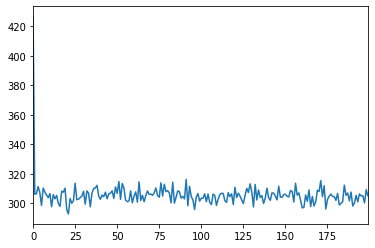

In [112]:
n = 103

theta_df = pd.DataFrame()
for i in range(len(df_list)):
    a = df_list[i].loc[:, df_list[i].columns.str.startswith('Theta')].T
    theta_df = theta_df.append(a, ignore_index=True)
theta_df
theta_df[n].plot()
print(f"theta = {theta_df[n].mean()}")
